In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Admission_data.csv')
print(df.shape)
df.head()

(500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.drop('Serial No.', axis=1, inplace=True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
data = df.drop('Chance of Admit ', axis=1)
labels = df['Chance of Admit ']

In [11]:
print(data.shape)
print(labels.shape)

(500, 7)
(500,)


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data, labels,
                                                   test_size=0.2, 
                                                   random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(400, 7)
(400,)
(100, 7)
(100,)


In [14]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [15]:
lr = LinearRegression()

In [16]:
lr.fit(x_train, y_train)

LinearRegression()

In [17]:
predictions = lr.predict(x_test)

In [18]:
lr.coef_

array([0.00243444, 0.00299587, 0.0025688 , 0.00181369, 0.01723798,
       0.11252708, 0.02402679])

In [19]:
lr.intercept_

-1.421447071901646

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
def adjr2(actual, predicted,n, d):
    """ R2 Score """
    return 1-(1-r2_score(actual,predicted))* (n-1)/(n-d-1)

In [22]:
print("Mean squared error is {}".format(mean_squared_error(y_test, predictions)))
print("Mean Absolute error is {}".format(mean_absolute_error(y_test, predictions)))
print("Root Mean squared error is {}".format(mean_squared_error(y_test, predictions,                                                                squared=False)))
print("R2 score is {}".format(r2_score(y_test, predictions)))


Mean squared error is 0.003704655398788409
Mean Absolute error is 0.04272265427705368
Root Mean squared error is 0.0608658804157831
R2 score is 0.8188432567829629


In [23]:
adjr2(y_test, predictions,n=y_test.shape[0], d=x_test.shape[1])

0.8050595915381884

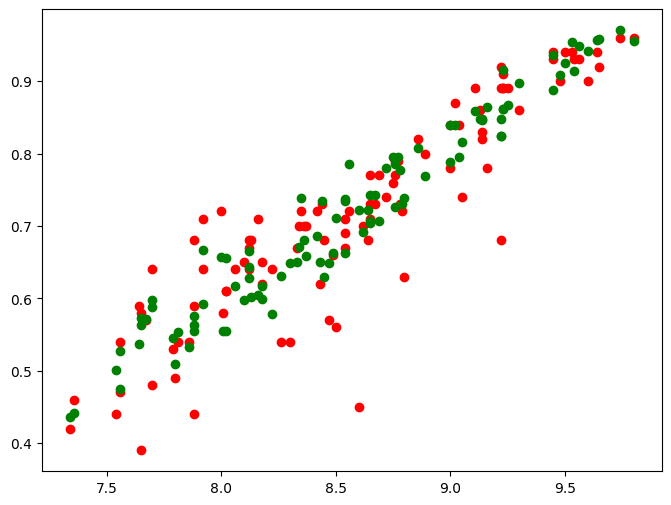

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(x_test['CGPA'], y_test, color='red')
plt.scatter(x_test['CGPA'], predictions, color='green')
plt.show()